In [1]:
import dipy

In [2]:
from dipy.io.image import load_nifti, save_nifti
from dipy.io.gradients import read_bvals_bvecs

In [3]:
from fenics import *
from mshr import *
#from math import pi, sin, cos, sqrt
import math
import matplotlib.pyplot as plt
import numpy as np
import nibabel as nib
import os

In [4]:
fname = 'dMRI_data/ss-ras_data.nii.gz' 
bval_fname = 'dMRI_data/ss-ras.bval' 
bvec_fname = 'dMRI_data/ss-ras.bvec'

data, affine = load_nifti(fname)
bvals, bvecs = read_bvals_bvecs(bval_fname, bvec_fname)
print('data.shape (%d, %d, %d, %d)' % data.shape)

data_float = data.astype(np.float32)

dataMaxVal = int(max(data.flatten()))
dataMinVal = int(min(data.flatten()))

print('b values: ', bvals)
print('b vectors: ', bvecs)

data.shape (104, 104, 72, 32)
b values:  [  0. 700. 700. 700. 700. 700. 700. 700. 700. 700. 700. 700. 700. 700.
 700. 700. 700. 700. 700. 700. 700.   0. 700. 700. 700. 700. 700. 700.
 700. 700. 700. 700.]
b vectors:  [[ 0.          0.          0.        ]
 [ 0.22293058 -0.49968055 -0.83703119]
 [-0.17871778 -0.49333411 -0.85128242]
 [-0.37542525 -0.14225766 -0.91587037]
 [ 0.41157657 -0.72193778 -0.556247  ]
 [ 0.19853516 -0.93616748 -0.29012811]
 [ 0.84751403 -0.52907634 -0.04240569]
 [ 0.73912424 -0.51868695 -0.42972025]
 [ 0.43850514 -0.15385152 -0.88546205]
 [ 0.75664991 -0.17243032 -0.63067305]
 [ 0.62896943 -0.74815804  0.21132247]
 [ 0.30347744 -0.94898587  0.0855993 ]
 [ 0.28489485 -0.54959691  0.78535217]
 [ 0.62077832 -0.54730117  0.56133366]
 [ 0.97062433 -0.19699152  0.13814011]
 [ 0.83273727 -0.20222756  0.51541471]
 [-0.03439669 -0.75075191  0.65968806]
 [-0.02572841 -0.94997877  0.31125325]
 [-0.68088585 -0.5256443   0.50999278]
 [-0.36761704 -0.53581387  0.76010603]
 [-

In [5]:
#center = Point(0.0, 0.0, 0.0)
#sphere = Sphere(center,1.0)
#mesh = generate_mesh(sphere,20) # 20 specify the resolution of the mesh
#plot(mesh)

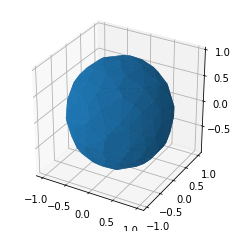

In [6]:
# Mesh and function space
#sphere = Sphere(Point(0.0, 0.0, 0.0), 1.0)
#vmesh = generate_mesh(sphere, 5)
#mesh = BoundaryMesh(vmesh, "exterior")
#plot(mesh)


#mesh = Mesh('LH/mesh_whole_sphere.xml')
#mesh = Mesh('LH/mesh.xml')

mesh = Mesh('LH/mesh_whole_sphere_myself.xml')
#mesh = Mesh('LH/mesh_on_sphere_myself.xml')
plot(mesh)

In [7]:
print(mesh.topology().dim())

3


In [8]:
# Optimization options for the form compiler
parameters["form_compiler"]["cpp_optimize"] = True
parameters["form_compiler"]["optimize"] = True

In [9]:
# Make mesh ghosted for evaluation of DG terms
parameters["ghost_mode"] = "shared_facet"

# Create mesh and define function space
#V = FunctionSpace(mesh, "CG", 2)
V = FunctionSpace(mesh, "P", 1)

In [10]:
# get coordinates of DOFs
dof_coords = V.tabulate_dof_coordinates()
# find nearest DOF:
dof1 = np.argmin(np.linalg.norm(dof_coords - bvecs[1], axis=1))
print('dof {}, x = {}'.format(dof1, dof_coords[dof1]))
dof1_sym = np.argmin(np.linalg.norm(dof_coords + bvecs[1], axis=1))
print('dof {}, x = {}'.format(dof1_sym, dof_coords[dof1_sym]))

dof14 = np.argmin(np.linalg.norm(dof_coords - bvecs[14], axis=1))
print('dof {}, x = {}'.format(dof14, dof_coords[dof14]))
dof14_sym = np.argmin(np.linalg.norm(dof_coords + bvecs[14], axis=1))
print('dof {}, x = {}'.format(dof14_sym, dof_coords[dof14_sym]))

dof17 = np.argmin(np.linalg.norm(dof_coords - bvecs[17], axis=1))
print('dof {}, x = {}'.format(dof17, dof_coords[dof17]))
dof17_sym = np.argmin(np.linalg.norm(dof_coords + bvecs[17], axis=1))
print('dof {}, x = {}'.format(dof17_sym, dof_coords[dof17_sym]))

dof20 = np.argmin(np.linalg.norm(dof_coords - bvecs[20], axis=1))
print('dof {}, x = {}'.format(dof20, dof_coords[dof20]))
dof20_sym = np.argmin(np.linalg.norm(dof_coords + bvecs[20], axis=1))
print('dof {}, x = {}'.format(dof20_sym, dof_coords[dof20_sym]))

dof22 = np.argmin(np.linalg.norm(dof_coords - bvecs[22], axis=1))
print('dof {}, x = {}'.format(dof22, dof_coords[dof22]))
dof22_sym = np.argmin(np.linalg.norm(dof_coords + bvecs[22], axis=1))
print('dof {}, x = {}'.format(dof22_sym, dof_coords[dof22_sym]))

dof29 = np.argmin(np.linalg.norm(dof_coords - bvecs[29], axis=1))
print('dof {}, x = {}'.format(dof29, dof_coords[dof29]))
dof29_sym = np.argmin(np.linalg.norm(dof_coords + bvecs[29], axis=1))
print('dof {}, x = {}'.format(dof29_sym, dof_coords[dof29_sym]))

# now define a DirichletBC at that point
bcs = [DirichletBC(V, Constant(data_float[60,50,56,1]),
                 'near(x[0], {x}) && near(x[1], {y}) && near(x[2], {z})'.format(x=dof_coords[dof1][0], y=dof_coords[dof1][1], z=dof_coords[dof1][2]),
                 'pointwise'),
      DirichletBC(V, Constant(data_float[60,50,56,1]),
                 'near(x[0], {x}) && near(x[1], {y})'.format(x=dof_coords[dof1_sym][0], y=dof_coords[dof1_sym][1], z=dof_coords[dof1_sym][2]),
                 'pointwise'),
      
      DirichletBC(V, Constant(data_float[60,50,56,14]),
                 'near(x[0], {x}) && near(x[1], {y})'.format(x=dof_coords[dof14][0], y=dof_coords[dof14][1], z=dof_coords[dof14][2]),
                 'pointwise'),
      DirichletBC(V, Constant(data_float[60,50,56,14]),
                 'near(x[0], {x}) && near(x[1], {y})'.format(x=dof_coords[dof14_sym][0], y=dof_coords[dof14_sym][1], z=dof_coords[dof14_sym][2]),
                 'pointwise'),
      
      DirichletBC(V, Constant(data_float[60,50,56,17]),
                 'near(x[0], {x}) && near(x[1], {y})'.format(x=dof_coords[dof17][0], y=dof_coords[dof17][1], z=dof_coords[dof17][2]),
                 'pointwise'),
      DirichletBC(V, Constant(data_float[60,50,56,17]),
                 'near(x[0], {x}) && near(x[1], {y})'.format(x=dof_coords[dof17_sym][0], y=dof_coords[dof17_sym][1], z=dof_coords[dof17_sym][2]),
                 'pointwise'),
      
      DirichletBC(V, Constant(data_float[60,50,56,20]),
                 'near(x[0], {x}) && near(x[1], {y})'.format(x=dof_coords[dof20][0], y=dof_coords[dof20][1], z=dof_coords[dof20][2]),
                 'pointwise'),
      DirichletBC(V, Constant(data_float[60,50,56,20]),
                 'near(x[0], {x}) && near(x[1], {y})'.format(x=dof_coords[dof20_sym][0], y=dof_coords[dof20_sym][1], z=dof_coords[dof20_sym][2]),
                 'pointwise'),
      
      DirichletBC(V, Constant(data_float[60,50,56,22]),
                 'near(x[0], {x}) && near(x[1], {y})'.format(x=dof_coords[dof22][0], y=dof_coords[dof22][1], z=dof_coords[dof22][2]),
                 'pointwise'),
      DirichletBC(V, Constant(data_float[60,50,56,22]),
                 'near(x[0], {x}) && near(x[1], {y})'.format(x=dof_coords[dof22_sym][0], y=dof_coords[dof22_sym][1], z=dof_coords[dof22_sym][2]),
                 'pointwise'),
      
      DirichletBC(V, Constant(data_float[60,50,56,29]),
                 'near(x[0], {x}) && near(x[1], {y})'.format(x=dof_coords[dof29][0], y=dof_coords[dof29][1], z=dof_coords[dof29][2]),
                 'pointwise'),
      DirichletBC(V, Constant(data_float[60,50,56,29]),
                 'near(x[0], {x}) && near(x[1], {y})'.format(x=dof_coords[dof29_sym][0], y=dof_coords[dof29_sym][1], z=dof_coords[dof29_sym][2]),
                 'pointwise')
     ]

# Define trial and test functions
u = TrialFunction(V)
v = TestFunction(V)

# Define normal component, mesh size and right-hand side
h = CellDiameter(mesh)
h_avg = (h('+') + h('-'))/2.0
n = FacetNormal(mesh)
f = Constant(0.0)

# Penalty parameter
alpha = Constant(8.0)
# Define bilinear form
a = inner(div(grad(u)), div(grad(v)))*dx \
  - inner(avg(div(grad(u))), jump(grad(v), n))*dS \
  - inner(jump(grad(u), n), avg(div(grad(v))))*dS \
  + alpha/h_avg*inner(jump(grad(u),n), jump(grad(v),n))*dS

# Define linear form
L = f*v*dx
    
# Solve variational problem
w = Function(V)
solve(a == L, w, bcs)

dof 128, x = [ 0.22293058 -0.49968055 -0.83703119]
dof 0, x = [-0.22293058  0.49968055  0.83703119]
dof 36, x = [ 0.97062433 -0.19699152  0.13814011]
dof 154, x = [-0.97062433  0.19699152 -0.13814011]
dof 51, x = [-0.02572841 -0.94997877  0.31125325]
dof 173, x = [ 0.02572841  0.94997877 -0.31125325]
dof 161, x = [-0.15568012  0.20317107 -0.96668768]
dof 20, x = [ 0.15568012 -0.20317107  0.96668768]
dof 11, x = [-0.24489762 -0.19681381  0.9493627 ]
dof 123, x = [ 0.24489762  0.19681381 -0.9493627 ]
dof 71, x = [-0.85508788 -0.50734621 -0.106886  ]
dof 87, x = [0.85508788 0.50734621 0.106886  ]


In [11]:
# Save solution to file in VTK format
vtkfile = File('Biharmonic/solution.pvd')
vtkfile << w

In [12]:
array_u = nodal_values_u = w.vector()
vertex_values_u = w.compute_vertex_values()

In [13]:
print(array_u)

In [14]:
for i in range(len(array_u)):
    print(array_u[i])

51.0
69.1313540172342
61.336929105722824
50.478283601502305
47.8847814638847
56.88284704494095
77.20164794422152
84.14193506203819
87.64377680625675
83.48682524819141
82.14984527281605
54.0
67.30571430215574
50.5688501165075
55.15045055809374
50.905436788624975
56.72251659968151
81.6996469748889
56.8182052328601
73.80503174890356
82.99999999999999
84.04585011141518
68.24772638122866
70.19545236528832
86.05258219929507
80.91977260285539
74.9843864039863
74.01676918799512
73.59718826372001
60.17128337143139
59.89908107811371
89.960530740973
88.26469987773642
93.46716648987145
70.20103861591083
76.57928500911667
90.0
94.45181871318458
83.01801209356294
102.84034217424269
94.90210190520777
98.20494232703265
94.2520163254902
96.43477484653752
94.5863750831536
93.1379789198235
93.28927763198847
91.93162210753673
90.19544565852347
87.58268187643422
88.1182746796103
92.0
91.19293419888407
90.80396426779879
82.7063551329331
89.14365719461357
93.53660314120663
64.87453353716587
71.74879113146224

In [15]:
min(array_u)

47.8847814638847

In [16]:
len(array_u)

178

In [17]:
bvecs[1][0]

0.22293058

In [18]:
bvecs[1][2]

-0.83703119

In [19]:
data_float[60,50,56,1]

51.0

In [20]:
data_float[60,50,56,14]

90.0

In [21]:
data_float[60,50,56,17]

92.0

In [22]:
data_float[60,50,56,20]

83.0

In [23]:
data_float[60,50,56,22]

54.0

In [24]:
data_float[60,50,56,29]

106.0

In [25]:
#error_L2 = errornorm(u_D, w, 'L2')
#vertex_values_u_D = u_D.compute_vertex_values(mesh)
#vertex_values_u = w.compute_vertex_values(mesh)
#error_max = np.max(np.abs(vertex_values_u_D - vertex_values_u))
#print(error_max)
#print(error_L2)

In [26]:
bvecs[27]

array([-0.70739847, -0.15345097, -0.68995672])

In [27]:
x_point = Point(*[bvecs[27]])
mesh.bounding_box_tree().compute_first_entity_collision(x_point)

4294967295

In [28]:
#mesh.bounding_box_tree().compute_closest_point(x_point)

In [29]:
def project_point_onto_affine_subspace(p, V):
    """Projects a point onto an affine subspace

    p.shape = (N,)   OR (num_pts, N) for vectorization over many points / affine subspaces
    V.shape = (k, N) OR (num_pts, k, N) for vectorization

    N = dimension of ambient space
    k-1 = dimension of affine subspace

    For a single point / affine subspace:
        - p is the point in R^N to be projected onto the affine subspace
        - The affine subspace is the set of all affine combinations
        of rows, V[i,:], of the matrix V

    Vectorization:
    For many points / affine subspaces, each point is
    projected onto its corresponding affine subspace
        p[i,:] is the ith point
        V[i,:,:] is the matrix defining the ith affine subspace

    Example usage:
        import numpy as np
        spatial_dim = 3
        p1 = np.random.randn(spatial_dim)
        V1 = np.array([[2., 0., 0.],
                      [2., 1., 0.],
                      [2., 0., 1.]])
        p2 = np.random.randn(spatial_dim)
        V2 = np.array([[0., 3., 0.],
                       [1., 3., 0.],
                       [0., 3., 1.]])
        p = np.stack([p1, p2])
        V = np.stack([V1, V2])
        projected_p, affine_coordinates = project_point_onto_affine_subspace(p, V)
        projected_p1 = projected_p[0,:]
        projected_p2 = projected_p[1,:]
        print('p1=', p1)
        print('projected_p1=', projected_p1)
        print('p2=', p2)
        print('projected_p2=', projected_p2)
    """
    if len(p.shape) == 1:
        PP = p.reshape((1, p.shape[0]))
        VV = V.reshape((1, V.shape[0], V.shape[1]))
    else:
        PP = p
        VV = V
    num_pts, k, N = VV.shape

    if k == 1:
        affine_coordinates = np.ones((num_pts, 1))
    else:
        VV0 = VV[:, 0, :].reshape((num_pts, 1, N))
        dVV = VV[:, 1: :].reshape((num_pts, k-1, N)) - VV0
        dPP = PP.reshape((num_pts, 1, N)) - VV0

        if k == 2:
            PHI = np.sum(dVV * dVV, axis=-1).reshape((num_pts))
            RHS = np.sum(dVV * dPP, axis=-1).reshape((num_pts))
            cc_rest = (RHS / PHI).reshape((num_pts, 1))
        else:
            PHI = np.einsum('xiz,xjz->xij', dVV, dVV) # shape = (num_pts, k-1, k-1)
            iPHI = np.linalg.inv(PHI) # shape = (num_pts, k-1, k-1)

            RHS = np.sum(dVV * dPP, axis=-1)  # shape = (num_pts, k-1)
            cc_rest = np.einsum('pij,pj->pi', iPHI, RHS)  # shape = (num_pts, k-1)

        cc_first = (1. - np.sum(cc_rest, axis=1)).reshape((num_pts, 1))
        affine_coordinates = np.concatenate([cc_first, cc_rest], axis=1) # shape = (num_pts, k)

    PP_projected = np.einsum('pi,pij->pj', affine_coordinates, VV) # shape = (num_pts, N)

    if len(p.shape) == 1:
        PP_projected = PP_projected.reshape(-1)
        affine_coordinates = affine_coordinates.reshape(-1)
    return PP_projected, affine_coordinates

def powerset(s):
    # NOT MY CODE. FROM USER "hughdbrown" ON STACKOVERFLOW HERE:
    # https://stackoverflow.com/a/1482320/484944
    x = len(s)
    masks = [1 << i for i in range(x)]
    for i in range(1 << x):
        yield [ss for mask, ss in zip(masks, s) if i & mask]

def closest_point_on_simplex(p, V):
    """Projects a point onto a simplex (triangle, tetrahedron, etc)

    p.shape = (N,)   OR (num_pts, N) for vectorization over many points/simplices
    V.shape = (k, N) OR (num_pts, k, N) for vectorization

    N = dimension of ambient space
    k-1 = dimension of simplex

    For a single point/simplex:
        - p is the point in R^N to be projected onto the simplex
        - The simplex is the set of all convex combinations
        of rows, V[i,:], of the matrix V

    Vectorization:
    For many points/simplices, each point is
    projected onto its corresponding simplex
        p[i,:] is the ith point
        V[i,:,:] is the matrix defining the ith simplex

    Example usage:
        import numpy as np
        import matplotlib.pyplot as plt
        p1 = np.array([1.1, 0.4])
        V1 = np.array([[0., 0.],
                       [0., 1.],
                       [1., 0.]])
        p2 = np.array([-0.3, 1.1])
        V2 = np.array([[-1.0, 0.],
                       [0.,   0.],
                       [-0.5, 0.5]])
        p = np.stack([p1, p2])
        V = np.stack([V1, V2])
        projected_p = closest_point_on_simplex(p, V)
        projected_p1 = projected_p[0,:]
        projected_p2 = projected_p[1,:]
        plt.figure()
        t1 = plt.Polygon(V1)
        plt.gca().add_patch(t1)
        plt.plot([p1[0], projected_p1[0]],
                 [p1[1], projected_p1[1]], 'r')
        t2 = plt.Polygon(V2)
        plt.gca().add_patch(t2)
        plt.plot([p2[0], projected_p2[0]],
                 [p2[1], projected_p2[1]], 'r')
        plt.gca().set_aspect('equal')
        plt.show()
    """
    if len(p.shape) == 1:
        PP = p.reshape((1, p.shape[0]))
        VV = V.reshape((1, V.shape[0], V.shape[1]))
    else:
        PP = p
        VV = V
    num_pts, k, N = VV.shape

    subsets = list(powerset(list(range(k)))) # e.g., [[], [0], [1], [2], [0,1], [0,2], [1,2], [0,1,2]]
    QQ = list()
    CC = list()
    for s in subsets:
        if s:
            simplicial_facet = VV[:,s,:]
            Q, C = project_point_onto_affine_subspace(PP, simplicial_facet)
            QQ.append(Q)
            CC.append(C)

    distances = np.stack([np.linalg.norm(Q - PP, axis=-1) for Q in QQ]) # shape=(num_facets, num_pts)

    good_inds = np.stack([(np.all(0. <= C, axis=1) & np.all(C <= 1., axis=1)) for C in CC]) # shape=(num_facets, num_pts)
    bad_inds = np.logical_not(good_inds)
    distances[bad_inds] = np.inf
    closest_inds = np.expand_dims(np.argmin(distances[:, :, None], axis=0), axis=0)

    QQ_stack = np.stack(QQ) # shape=(num_facets, num_pts, N)
    PP_projected = np.take_along_axis(QQ_stack, closest_inds, axis=0)[0,:,:]

    if len(p.shape) == 1:
        PP_projected = PP_projected.reshape(-1)
    return PP_projected

def closest_point_in_mesh(p, mesh):
    """Finds the nearest point in a mesh to a given point
    p is the point or points (numpy array)
    mesh is the fenics/dolfin mesh

    p.shape = (N,) OR (num_pts, N) for vectorization over many points
    N = dimension of ambient space

    Example usage:
        import numpy as np
        import dolfin as dl
        import matplotlib.pyplot as plt
        mesh = dl.UnitSquareMesh(13,9)
        num_pts = 20
        p = np.random.randn(num_pts, 2) + np.array([0.5, 0.5])
        closest_p = closest_point_in_mesh(p, mesh)
        plt.figure()
        dl.plot(mesh)
        for ii in range(num_pts):
            plt.plot([p[ii,0], closest_p[ii,0]], [p[ii,1], closest_p[ii,1]], 'b')
            plt.plot(p[ii,0], p[ii,1], '*k')
            plt.plot(closest_p[ii,0], closest_p[ii,1], '.r')
        plt.show()
    """
    if len(p.shape) == 1:
        PP = p[None,:]
    else:
        PP = p
    num_pts, N = PP.shape
    tdim = mesh.topology().dim()
    k = tdim + 1

    VV = np.zeros((num_pts, k, N))
    bbt = mesh.bounding_box_tree()
    for ii in range(num_pts):
        pi = PP[ii,:]
        closest_entity, closest_distance = bbt.compute_closest_entity(Point(pi))
        closest_cell = mesh.cells()[closest_entity]
        vertices_of_closest_cell = mesh.coordinates()[closest_cell, :]
        VV[ii, :, :] = vertices_of_closest_cell

    closest_PP = closest_point_on_simplex(PP, VV)

    if len(p.shape) == 1:
        closest_PP = closest_PP.reshape(-1)
    return closest_PP

In [30]:
closest_p = closest_point_in_mesh(bvecs[27], mesh)
print(bvecs[27])
print(closest_p)
print(w(closest_p))

[-0.70739847 -0.15345097 -0.68995672]
[-0.49870337 -0.35379077 -0.58971146]
89.85352383002163


In [31]:
closest_p = closest_point_in_mesh(-bvecs[27], mesh)
print(-bvecs[27])
print(closest_p)
print(w(closest_p))

[0.70739847 0.15345097 0.68995672]
[0.70739847 0.15345097 0.68995672]
96.4347748465375


In [32]:
w(bvecs[27])

97.33767528566489

In [33]:
w(-bvecs[27])

96.4347748465375

In [34]:
array_1 = np.array([[1, 2, 7], [3, 4, 8]])

In [35]:
array_2 = np.array([[1, 2], [3, 9], [4, 16]]) 

In [36]:
np.dot(array_1, array_2)

array([[ 35, 132],
       [ 47, 170]])